# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   Dataset diperoleh dari **Kaggle** yang dapat diakses melalui link berikut: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

2. **Penjelasan Tentang Dataset**:
<br> Menurut Organisasi Kesehatan Dunia (WHO), stroke merupakan penyebab kematian nomor dua di dunia, yang bertanggung jawab atas sekitar 11% dari total kematian.
Dataset ini digunakan untuk memprediksi apakah seorang pasien cenderung terkena stroke berdasarkan parameter input seperti jenis kelamin, usia, berbagai penyakit, dan status merokok. Setiap baris dalam data memberikan informasi yang relevan tentang pasien.

3. **Penjelasan Tentanmg Variabel di Dataset**
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import joblib

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('../dataset_raw/healthcare-dataset-stroke_raw.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df['hypertension'] = df["hypertension"].astype('object')
df['heart_disease'] = df["heart_disease"].astype('object')
df['stroke'] = df["stroke"].astype('object')

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5110.0,NaN,NaN,NaN,36517.829354,21161.721625,67.0,17741.25,36932.0,54682.0,72940.0
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110.0,NaN,NaN,NaN,43.226614,22.612647,0.08,25.0,45.0,61.0,82.0
hypertension,5110.0,2.0,0.0,4612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heart_disease,5110.0,2.0,0.0,4834.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110.0,NaN,NaN,NaN,106.147677,45.28356,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,NaN,NaN,NaN,28.893237,7.854067,10.3,23.5,28.1,33.1,97.6


In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop(columns=['id'], inplace=True)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
numeric = []
categorical = []
for col in df.columns:
  if df[col].dtype in ["int64", "float64"]:
    numeric.append(col)
  elif df[col].dtype == "object":
    categorical.append(col)
print(numeric)
print(categorical)

['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


## Univariate

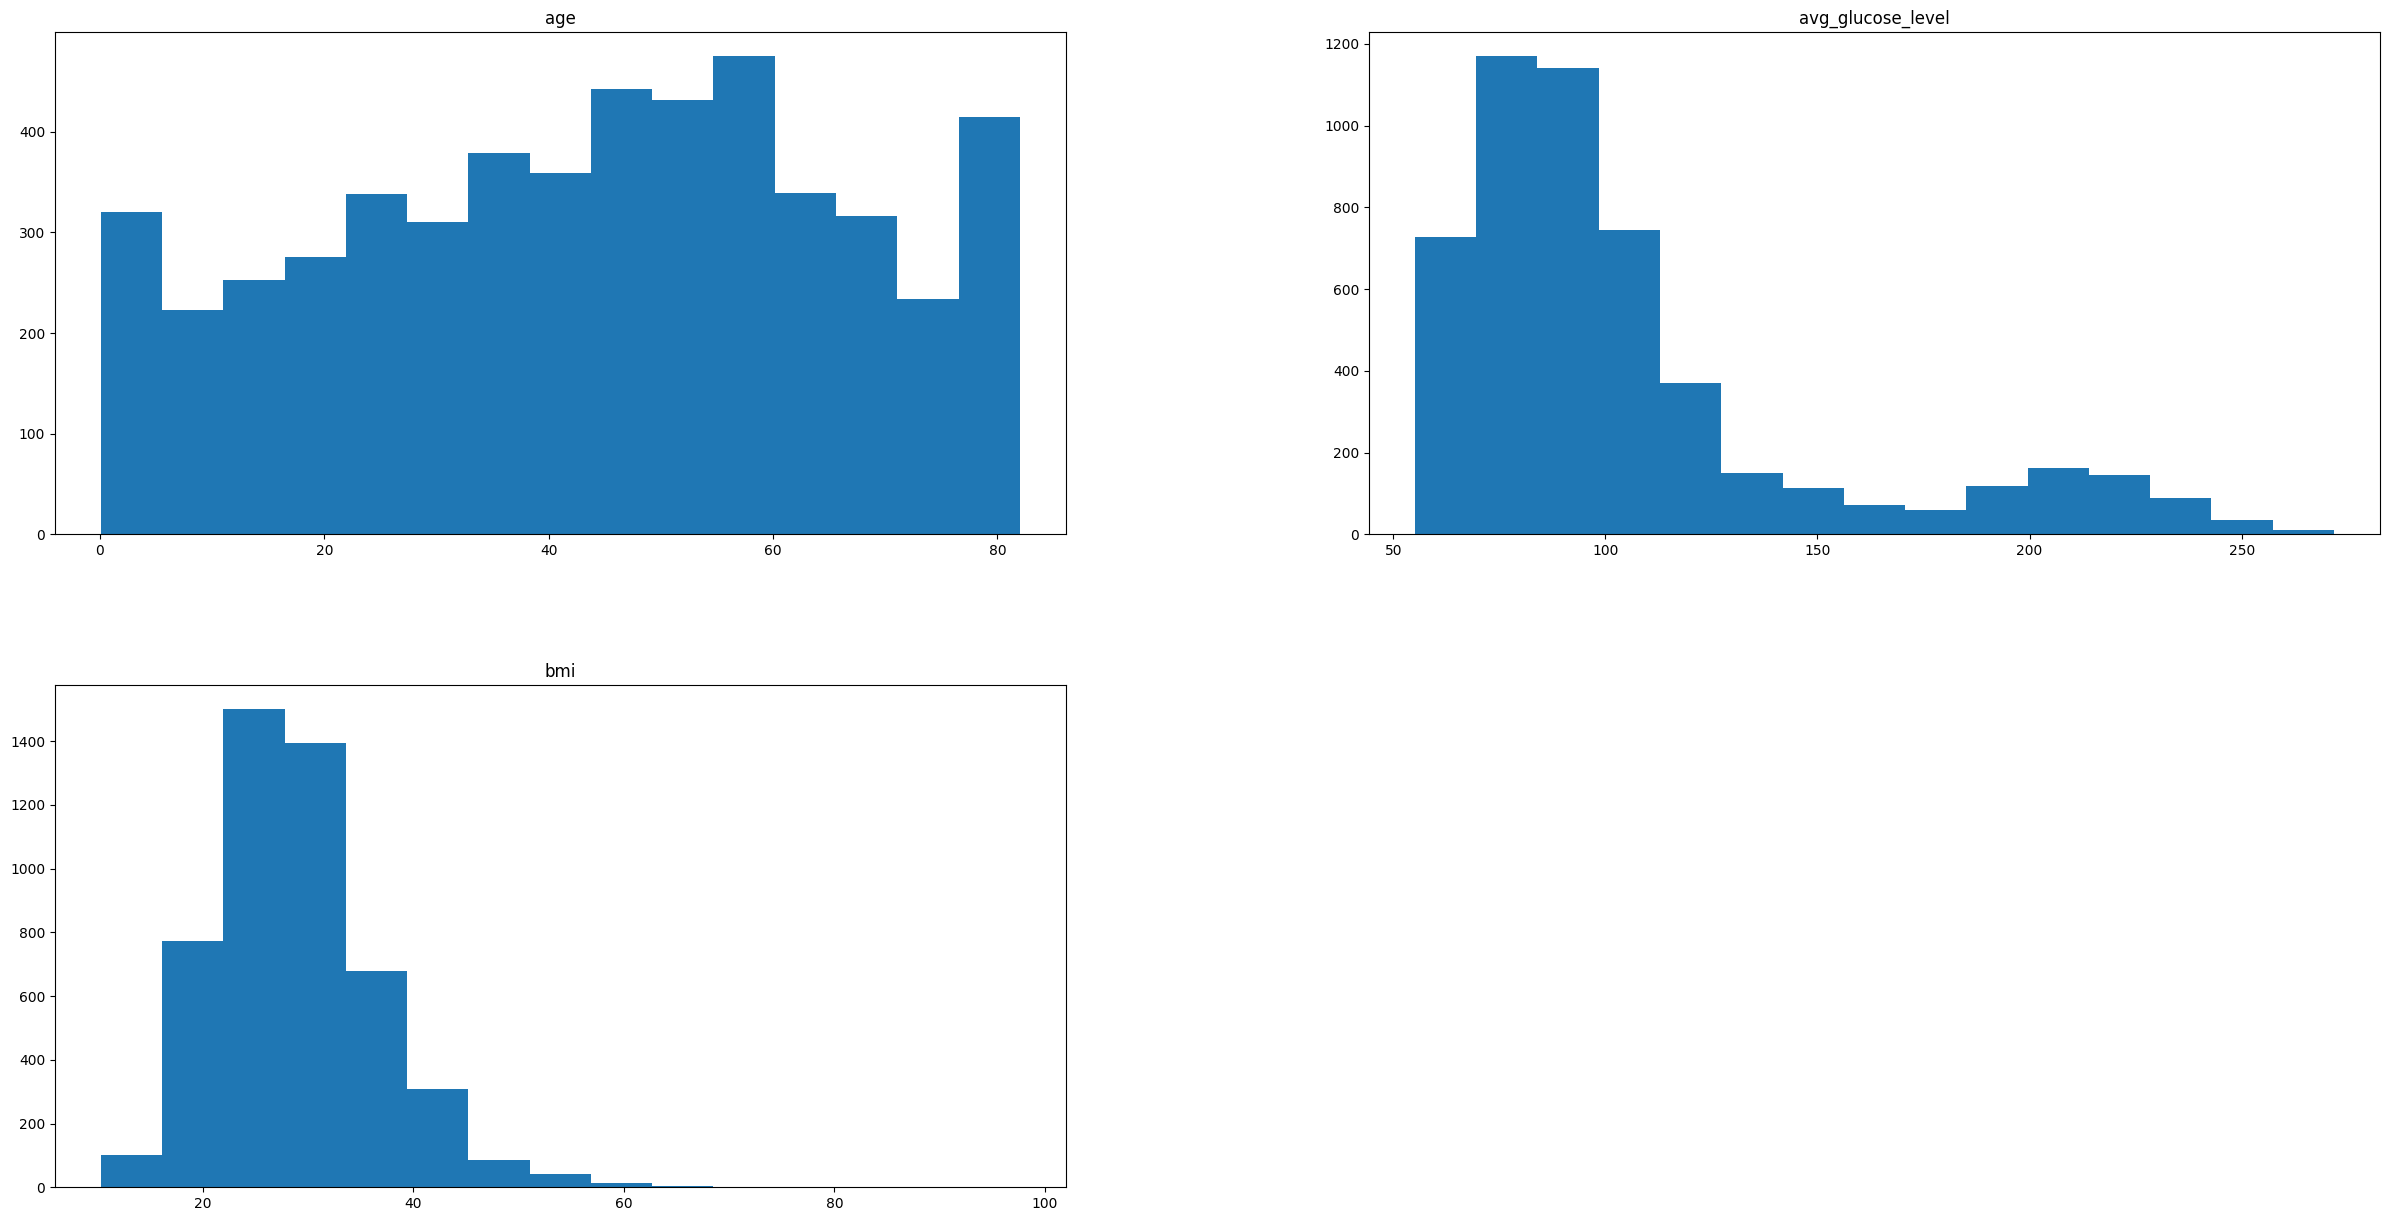

In [31]:
df[numeric].hist(figsize=(30,15),bins=15, grid=False)
plt.show()

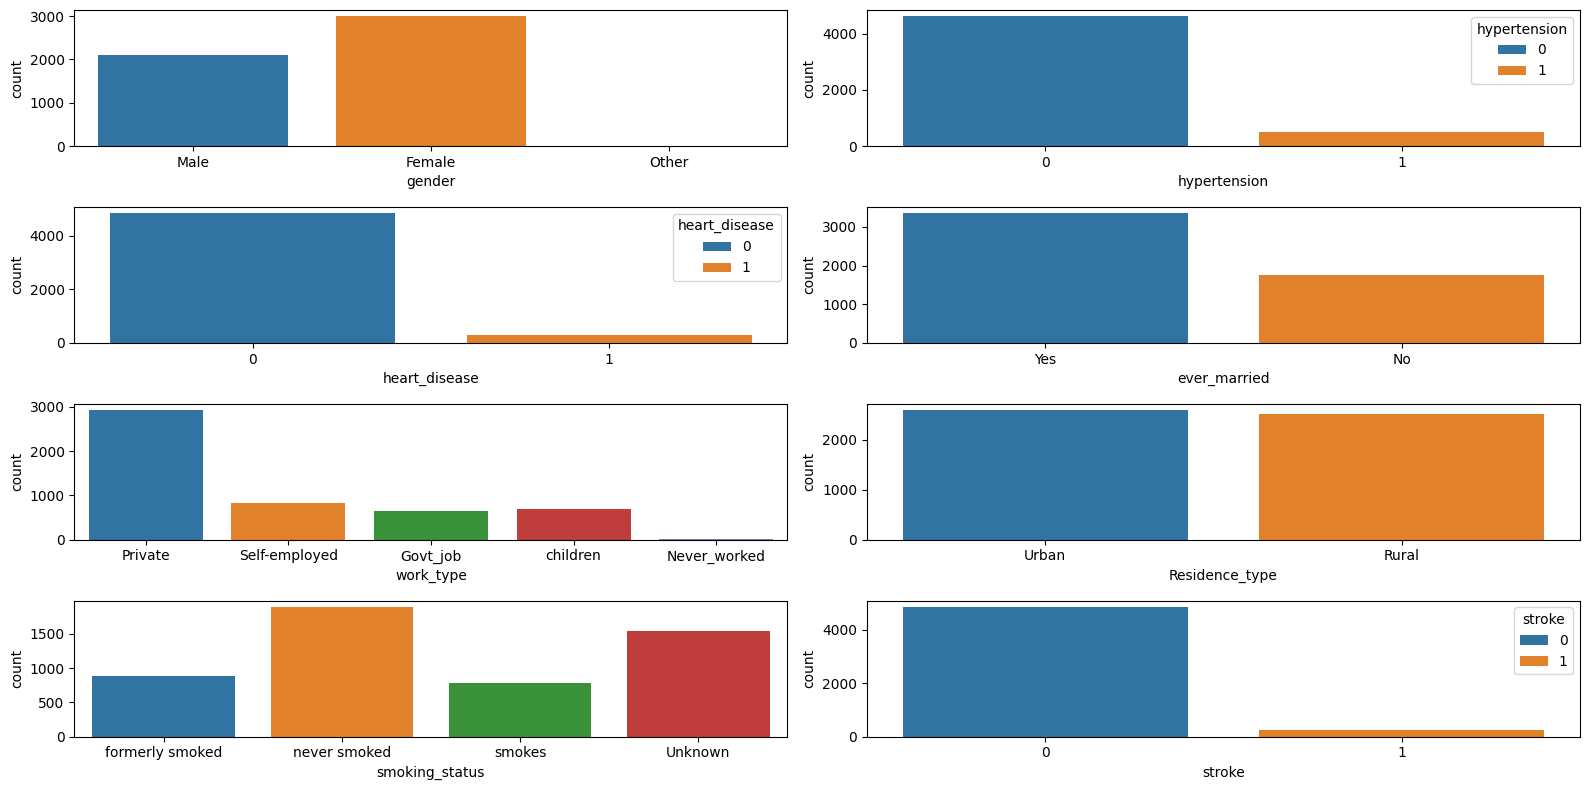

In [33]:
fig, axes = plt.subplots(4, 2, figsize=(16,8))
axes = axes.flatten()

for i, feature in enumerate(categorical):
  sns.countplot(data=df, x=feature, hue=feature, ax=axes[i])

plt.tight_layout()
plt.show()

## Multivariate

In [36]:
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(np.round(len(features)/2).astype('int64'), 2,figsize=(16,16))
    ax = ax.flatten()
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

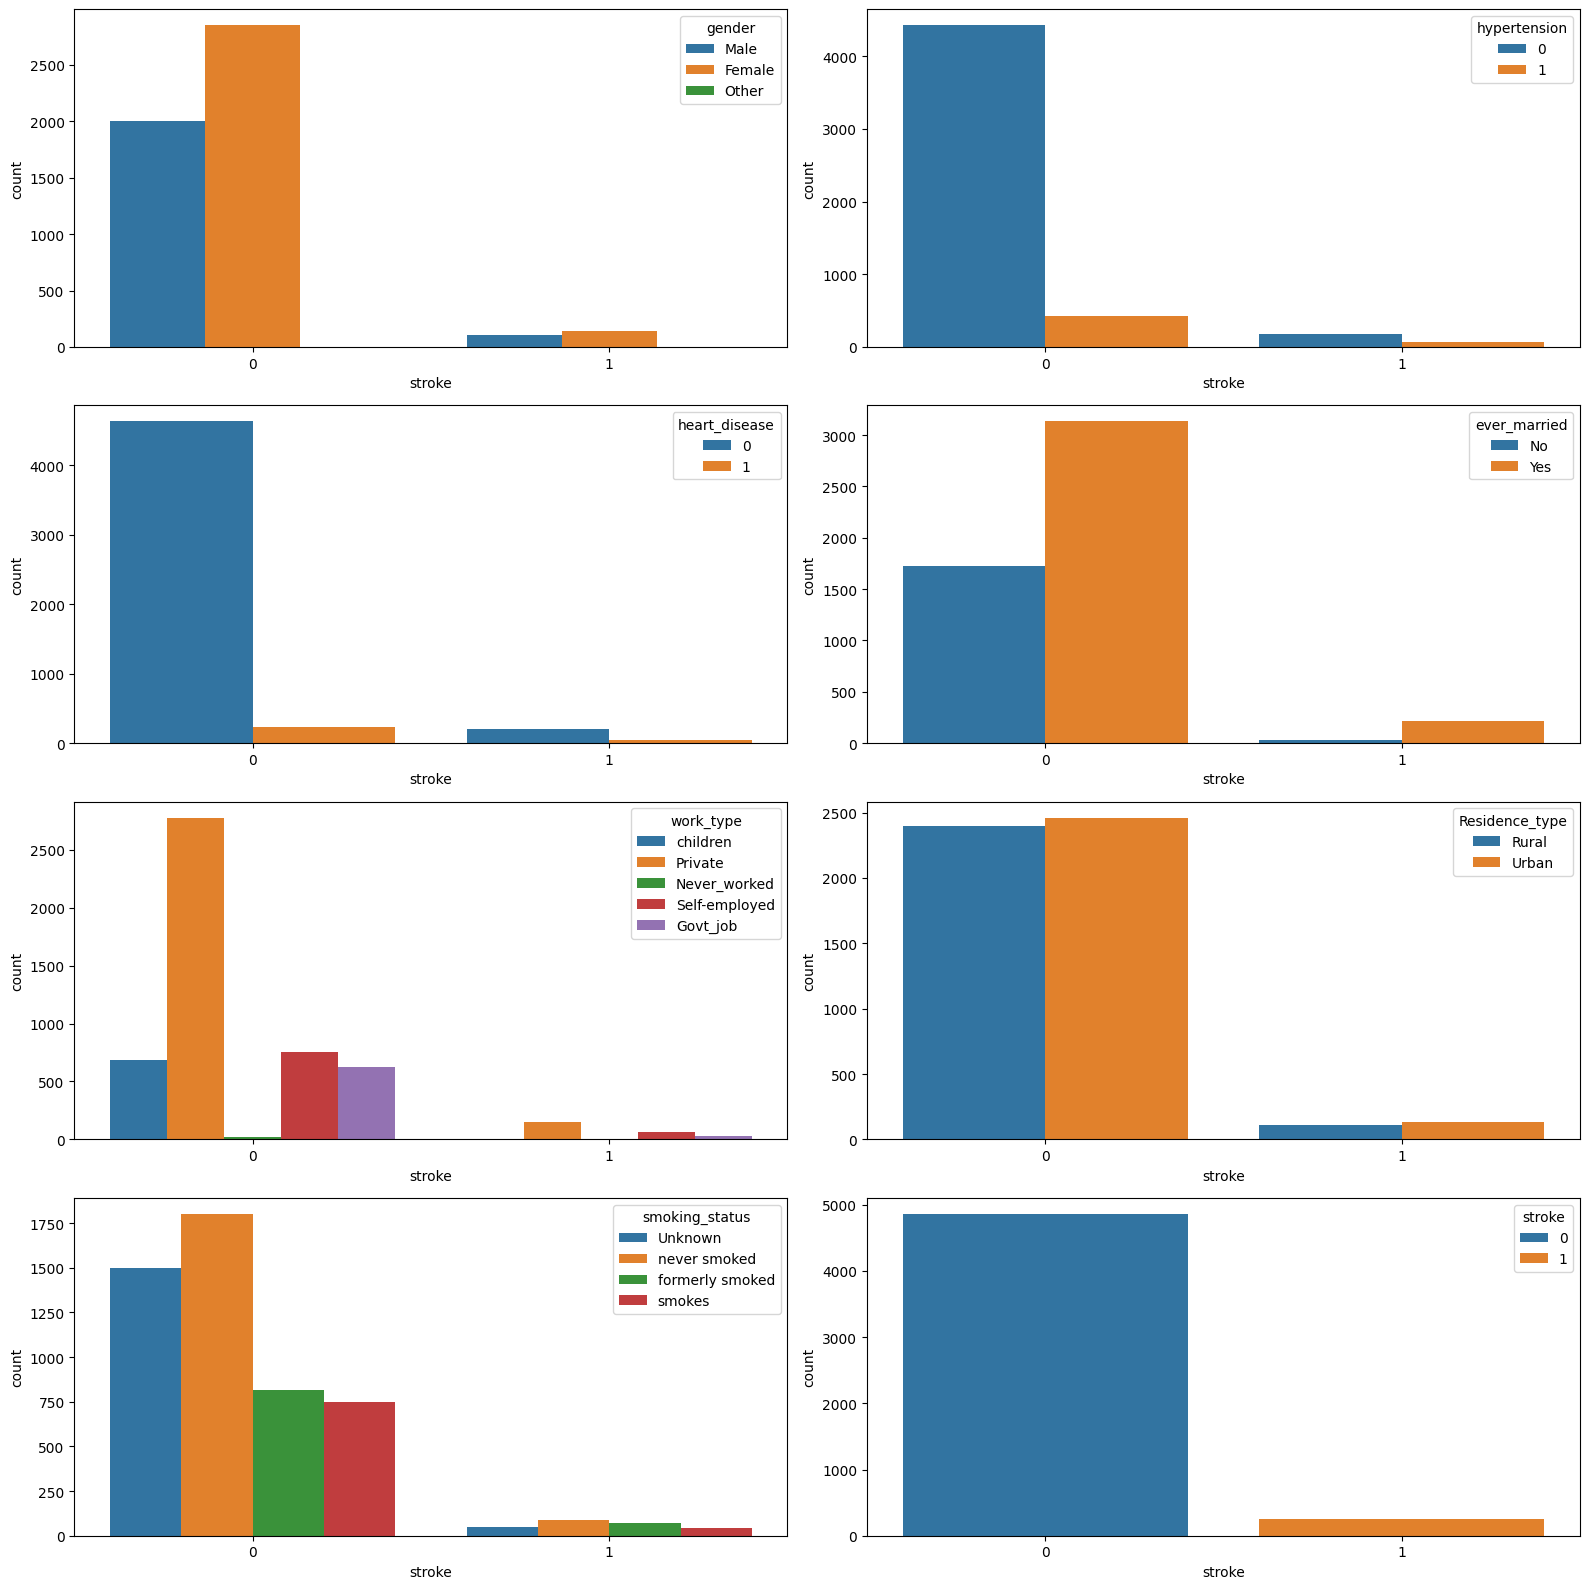

In [37]:
categorical_plot(
    features=categorical,
    df=df,
    segment_feature="stroke"
)

In [ ]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(np.ceil(len(features)/2).astype('int64'), 2,figsize=(16,16))
    ax = ax.flatten()
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(x=segment_feature, y=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
            ax[i].set_title(f"{feature} by {segment_feature}")
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

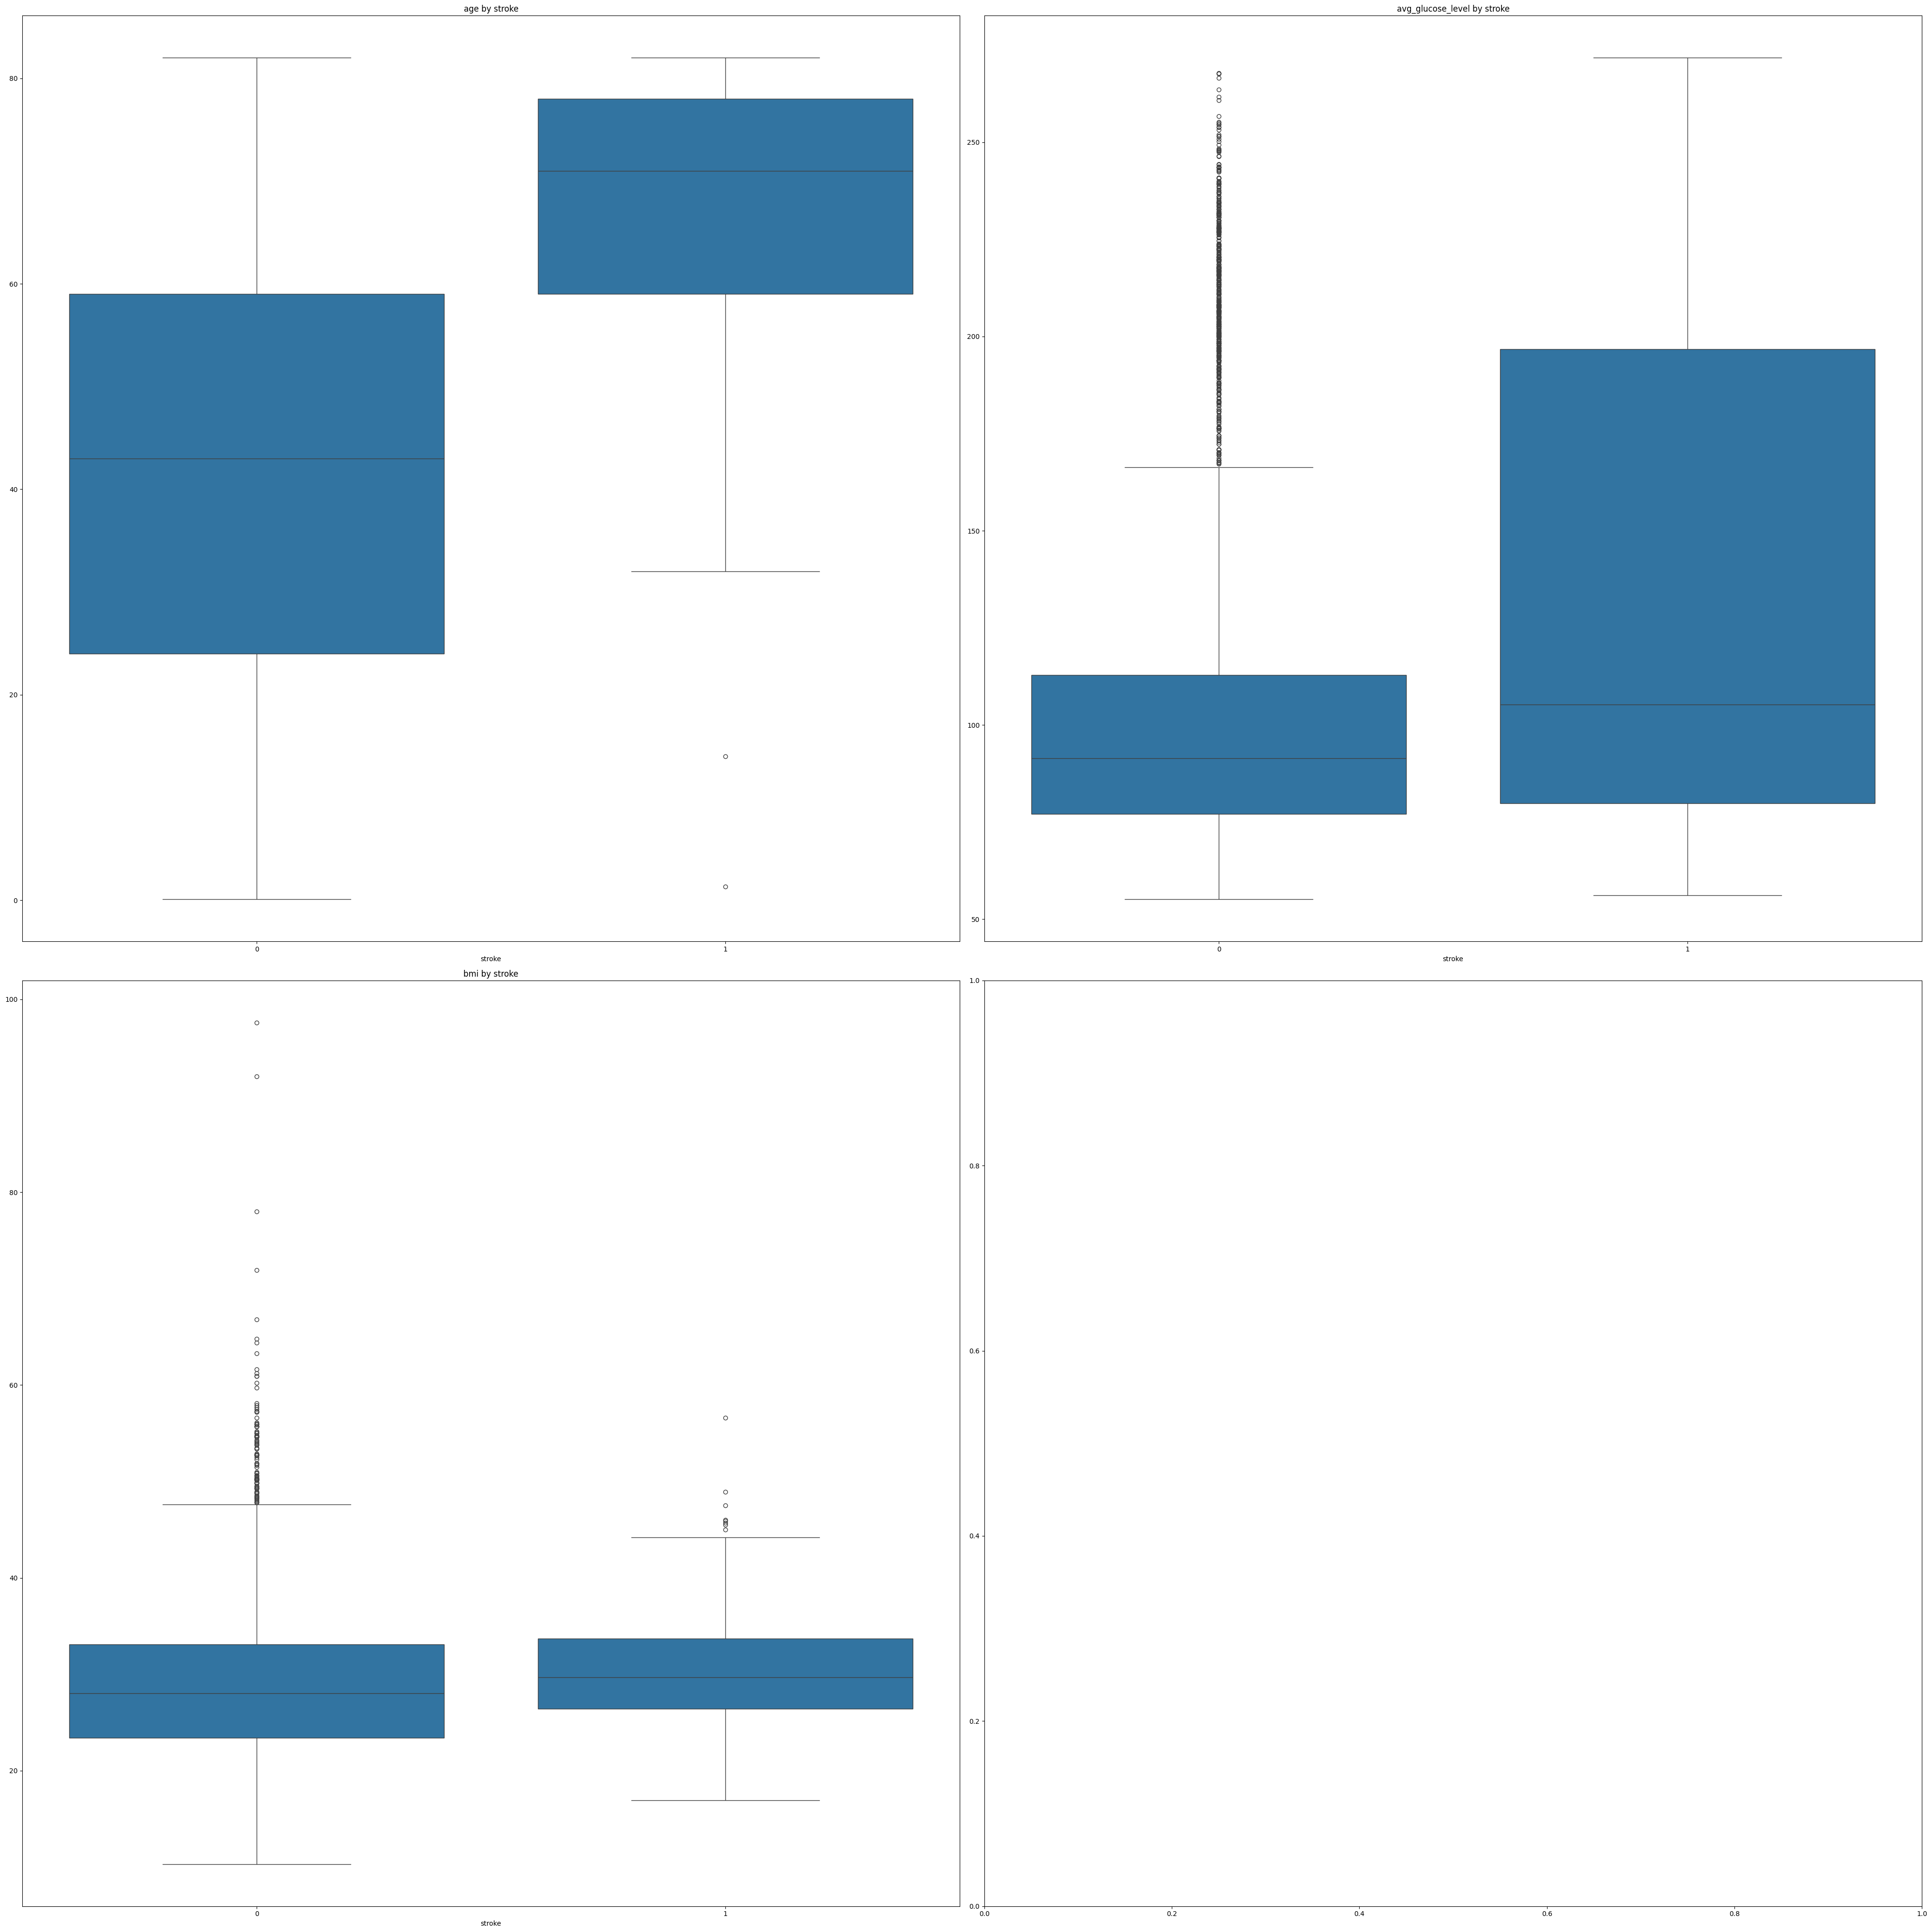

In [39]:
numerical_dis_plot(
    features=numeric,
    df=df,
    segment_feature="stroke"
)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Menghapus Data Kosong dan Data Duplikat

In [22]:
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [3]:
def fill_missing_values(df):
    for col in df.columns:
        if df[col].dtype in ["int64", "float64"]:
            df[col].fillna(df[col].mean(), inplace=True)
        elif df[col].dtype == "object":
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df

df = fill_missing_values(df)
df.isnull().sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10856\133673268.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10856\133673268.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Standardisasi

In [6]:
def stadardize_data(df, numeric_features):
    for feature in numeric_features:
        mean = df[feature].mean()
        std = df[feature].std()
        df[feature] = (df[feature] - mean) / std
    return df

df = stadardize_data(df, numeric)
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,-1.298185,Male,1.051331,-0.328570,4.184622,Yes,Private,Urban,2.706111,1.001136e+00,formerly smoked,4.417948
1,0.716301,Female,0.785993,-0.328570,-0.238923,Yes,Self-employed,Rural,2.121351,4.615102e-16,never smoked,4.417948
2,-0.255453,Male,1.626231,-0.328570,4.184622,Yes,Private,Rural,-0.005028,4.685314e-01,never smoked,4.417948
3,1.118254,Female,0.255317,-0.328570,-0.238923,Yes,Private,Urban,1.437217,7.153482e-01,smokes,4.417948
4,-1.646975,Female,1.582008,3.042899,-0.238923,Yes,Self-employed,Rural,1.501038,-6.356489e-01,never smoked,4.417948


## Outlier

In [7]:
outliers = {}
def detect_outliers(df, numeric_features):
    for feature in numeric_features:
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

def remove_outliers(df, numeric_features):
    for feature in numeric_features:
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

In [8]:
outliers = detect_outliers(df, numeric)
outliers

{'id': Empty DataFrame
 Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
 Index: [],
 'age': Empty DataFrame
 Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
 Index: [],
 'hypertension':             id  gender       age  hypertension  heart_disease ever_married  \
 4    -1.646975  Female  1.582008      3.042899      -0.238923          Yes   
 6     0.820546    Male  1.360893      3.042899       4.184622          Yes   
 10   -1.153443  Female  1.670454      3.042899      -0.238923          Yes   
 15    1.024688  Female  0.299540      3.042899      -0.238923          Yes   
 17   -0.113310    Male  1.405116      3.042899      -0.238923          Yes   
 ...        ...     ...       ...           ...            ...          ...   
 5088 -0.677064  Female  0.918662      3.042899      -0.238923      

In [9]:
remove_outliers(df,numeric)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,-1.298185,Male,1.051331,-0.328570,4.184622,Yes,Private,Urban,2.706111,1.001136e+00,formerly smoked,4.417948
1,0.716301,Female,0.785993,-0.328570,-0.238923,Yes,Self-employed,Rural,2.121351,4.615102e-16,never smoked,4.417948
2,-0.255453,Male,1.626231,-0.328570,4.184622,Yes,Private,Rural,-0.005028,4.685314e-01,never smoked,4.417948
3,1.118254,Female,0.255317,-0.328570,-0.238923,Yes,Private,Urban,1.437217,7.153482e-01,smokes,4.417948
4,-1.646975,Female,1.582008,3.042899,-0.238923,Yes,Self-employed,Rural,1.501038,-6.356489e-01,never smoked,4.417948
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,-0.864005,Female,1.626231,3.042899,-0.238923,Yes,Private,Urban,-0.494609,4.615102e-16,never smoked,-0.226305
5106,0.394825,Female,1.670454,-0.328570,-0.238923,Yes,Self-employed,Urban,0.420734,1.442808e+00,never smoked,-0.226305
5107,-0.793642,Female,-0.363806,-0.328570,-0.238923,Yes,Self-employed,Rural,-0.511393,2.217146e-01,never smoked,-0.226305
5108,0.048492,Male,0.343763,-0.328570,-0.238923,Yes,Private,Rural,1.328127,-4.278032e-01,formerly smoked,-0.226305


## Encoding

In [10]:
from sklearn.preprocessing import OneHotEncoder

le = OneHotEncoder()

categorical_without_target = [col for col in categorical if col != 'stroke']

def encode_categorical_features(df, categorical_features):
    return pd.get_dummies(df, columns=categorical_features, drop_first=True)


df_input = encode_categorical_features(df, categorical_without_target)
df_input.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-1.298185,1.051331,-0.328570,4.184622,2.706111,1.001136e+00,4.417948,True,False,True,False,True,False,False,True,True,False,False
1,0.716301,0.785993,-0.328570,-0.238923,2.121351,4.615102e-16,4.417948,False,False,True,False,False,True,False,False,False,True,False
2,-0.255453,1.626231,-0.328570,4.184622,-0.005028,4.685314e-01,4.417948,True,False,True,False,True,False,False,False,False,True,False
3,1.118254,0.255317,-0.328570,-0.238923,1.437217,7.153482e-01,4.417948,False,False,True,False,True,False,False,True,False,False,True
4,-1.646975,1.582008,3.042899,-0.238923,1.501038,-6.356489e-01,4.417948,False,False,True,False,False,True,False,False,False,True,False


## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

X = df_input
y = df["stroke"]
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Simpan Hasil Preprocessing

In [14]:
df_input.to_csv("healthcare-dataset-stroke_preprocessing.csv", index=False)